<h1 align='center'> Exploratory Project into Data Management,<br/> Analysis and Security</h1>

-----

## Learning Outcomes Achieved
The following learning outcomes were achieved:
- **Gained knowledge and understanding of descriptive and predictive data analysis methods, optimization and search, and knowledge representation.** 
- **Formulate and extract descriptive and predictive statistics from data** 
- **Analyse and interpret results from descriptive and predictive data analysis**
- **Apply their knowledge to a given problem domain and articulate potential data analysis problems**



******
# Context
******

## Self Project: Exploring Cybersecurity Threats and Vulnerabilities

In my self-initiated project, I've taken on the role of a cybersecurity enthusiast, leveraging my skills as a data scientist to delve into the realm of recent cybersecurity threats. Inspired by a professional background in cybersecurity consulting, I aim to independently assess the risks and impacts of these threats, mirroring the responsibilities I undertook in a previous team assignment.

## Understanding Cybersecurity Significance:

Cybersecurity, as defined by IBM (2022), is the practice of safeguarding critical systems and sensitive information from digital attacks. These attacks, ranging from malware and phishing to ransomware and DDoS, pose significant risks to individuals, businesses, and society as a whole. The real-world consequences of cyber-attacks, including financial loss, privacy breaches, and service disruptions, underscore the urgency of addressing this issue.

## Initiating the Investigation:

To commence my exploration, I first identified the key components of my investigation—recent cybersecurity threats. Drawing inspiration from my professional experience, I recognized the importance of utilizing authoritative sources to gather information. Two primary systems emerged:

## Common Vulnerability and Exposures (CVE) System:

This database, widely used by major tech companies, catalogues publicly known vulnerabilities in software. It is maintained by The MITRE Corporation and serves as a foundational resource for identifying vulnerabilities.
The CVE system, however, is complemented by organizations like the National Vulnerability Database (NVD).
Common Weakness Enumeration (CWE) System:

Developed by MITRE, CWE categorizes types of software vulnerabilities. Unlike CVE, which lists known vulnerabilities, CWE focuses on weaknesses' characteristics and is categorized by software development, hardware design, and research concepts.
Common Vulnerability Scoring System (CVSS):

CVSS, a scoring system developed by the National Vulnerability Database (NVD), assesses the impact of vulnerabilities identified in the CVE system. It plays a crucial role in quantifying the severity of vulnerabilities.
Leveraging the Assignment Dataset:

In my self-project, I have acquired a dataset derived from the CVSS data for the year 2020, sourced from the National Vulnerability Database. This dataset, focused on the Software Development viewpoint, includes unique CVEs mapped to one or more CWEs, each assigned a vulnerability score by the CVSS system.

## Exploration and Analysis:

With this dataset as my foundation, I'm poised to tackle questions and challenges related to cybersecurity threats. Armed with Python, data analysis skills, and a basic understanding of machine learning, I'm eager to employ exploratory analysis and potentially develop models to contribute meaningfully to the field.

This self-project not only aligns with my professional expertise but also showcases my proactive approach to skill development and problem-solving in the ever-evolving landscape of cybersecurity.

## References:

IBM. (2022). What is Cybersecurity? | IBM. https://www.ibm.com/au-en/topics/cybersecurity
Camacho, R. (2021). All about CWE: Common Weakness Enumeration. Parasoft. https://www.parasoft.com/blog/what-is-cwe

**********
## Data Description 

The below tables provide an outline of the data, broken down into the columns of the dataset features identified. 

###  The CVSS data table
| Column Name    | Description    |
| :------------- | :------------- |
| cve_id         | The CVE identifier for the vulnerability |
| assigner       | The entity who assigned the CVE |
| description     | A description of the vulnerability |
| cwe_ids         | The CWE identifiers of the vulnerability. Note that there can be multiple cwe_id's attached to one cve_id |
| refs            | url links to the initial postings of the vulnerability |
| ref_names       | other information which provide more reference about the CVE |
| ref_sources     | other information which provide more reference about the CVE |
| ref_tags        | other information which provide more reference about the CVE |
| v3_attackVector | CVSSv3 field, identifier for how the vulnerability would be used in an attack |
| v3_attackComplexity | CVSSv3 field, identifier for the difficulty of performing an attack using the vulnerability |
| v3_privilegesRequired | CVSSv3 field, an identifier for the privileges required in the system to use the vulnerability successfully |
| v3_userInteraction | CVSSv3 field, an identifier for whether a user needs to actively interact for the vulnerability to be exploited or not |
| v3_scope | CVSSv3 field, an identifier for whether the scope of an item changes when using the vulnerability. e.g: whether a regular user becomes a superuser. |
| v3_confidentialityImpact | CVSSv3 field, identifier for the impact upon the confidentiality of information in the product/service after using the vulnerability |
| v3_integrityImpact | CVSSv3 field, identifier for the impact upon the integrity of information in the product/service after using the vulnerability |
| v3_availabilityImpact | CVSSv3, field, identifier for the impact upon the availability of information in the product/service after using the vulnerability |
| v3_exploitabilityScore | The Exploitability Score is a sub score of the CVSS Base Score |
| v3_impactScore | The Impact Score is a sub score of the CVSS Base Score |
| v3_baseScore | The CVSS score (out of 10) given to the vulnerability based on CVSS v3.1 |
| v3_baseSeverity | A textual representation of the numeric Base Score|

We only use the Base Metrics out of the [CVSS Metrics](https://www.first.org/cvss/v3-1/media/MetricGroups.svg). While there are additional metrics that can be applied, most are variants. Therefore, we will use the base metrics. The column names starting with 'v3_' are CVSS v3.1 metrics. Refer to the specification document  [CVSSv3.1 Guide](https://www.first.org/cvss/v3.1/specification-document) for more information on the metrics. 

**Note:** While this dataset has 20 columns, the data in the last four columns have been purposely omitted (see Question 2 of the Assignment).

###  The CVE to Configurations mapping table
| Column Name    | Description    |
| :------------- | :------------- |
| cve_id         | The CVE identifier for the vulnerability |
| vendor         | The name of the vendor who produces the product |
| product_name   | The name of the affected product       |
| version        | List of the affected product versions |

Recall that a CVE can affect multiple products and multiple software versions of a product.

*******************
## Package Imports

In [3]:
# Common Imports
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline

In [4]:
# Import additional modules here as required
# It is unlikely that you would need any additional modules, however we had added space here just in case you feel 
#     extras are required. Note that justification as to WHY you are using them MUST be provided.
import sklearn.metrics as mk
from sklearn.metrics import r2_score

# sklearn.metrics is used in question 5 to find how well the data fits
from sklearn.model_selection import train_test_split    # train-test split
from sklearn.neighbors import KNeighborsClassifier      # k-Nearest Neighbours
# Note that only modules in the standard Anaconda distribution are allowed. If you need to install it manually, it is not an accepted package.
#
#

****
## Loading and Processing the Data
In the initial phase of my self-directed exploration into cybersecurity data, the primary focus is on loading and preparing the datasets for subsequent analysis. Recognizing the diverse nature of the data, which encompasses various types such as Categorical, Numerical, and Text, I aim to ensure its usability by performing essential pre-processing steps. It's worth noting that the datasets, sourced from the './data' folder, may not be flawless and could contain missing data or invalid values, warranting thoughtful handling.

#### What I Accomplished:
In my data preparation phase, I executed several key actions to optimize the dataset for subsequent analysis. Firstly, I streamlined the dataframe by eliminating redundant columns that held no relevance for future inquiries, such as 'refs,' 'refs_tags,' and other reference-related columns, using the drop function. This strategic reduction in size aimed to enhance the dataset's manageability.

Subsequently, I replaced categorical data with its numerical counterparts using the .replace function, a solution gleaned from a straightforward internet search (e.g., converting 'v3_attackVector' to 'v3_availabilityImpact'). This transformation simplifies the dataset and aligns it with the requirements of upcoming questions.

For 'v3_privilegeRequired,' I leveraged the conditional "&" operator, devising an approach to replace categorical data with the correct numerical values. A meticulous search through the data, coupled with the use of .eq, facilitated this conditional replacement. All replacement values were cross-verified against the provided documentation for accuracy.

To enrich the dataset and pave the way for subsequent questions, I merged the two tables after eliminating duplicates in the configuration file. Duplicating the 'cve_id' column was a strategic move, making it more straightforward to address the requirements of question 5b related to word analysis. Additionally, I utilized drop_duplicates to eliminate all instances of duplicated 'cve_id,' a crucial step to ensure accurate data representation for later questions (3c and 3d).

#### Rationale Behind My Actions:
Column Handling:
I opted against splitting or merging columns as maintaining clarity in understanding each column was paramount to me. Renaming columns from 'v3**' to '**' variants might not have significantly enhanced my personal understanding, but I acknowledged that such changes could potentially benefit others who might review the dataset.

Data Replacement:
The decision to replace all categorical data was made in anticipation of Question 2, aiming to streamline the dataset and save time in subsequent questions. This proactive approach ensures the dataset is consistently formatted, facilitating a smoother analytical process.

Data Merging:
The strategic merge of both dataframes was driven by the anticipation of benefits in addressing questions 3c and 3d, saving time and contributing to more efficient analysis.

Handling Duplicates:
Dropping 'cve_id' duplicates was a necessary step to ensure the integrity of data representation in subsequent questions (3c and 3d), preventing inaccuracies that could arise from duplicated entries.

In summary, these actions were taken with a holistic view of optimizing the dataset for clarity, efficiency, and accuracy in addressing the upcoming questions in my cybersecurity self-project.



In [1]:
# YOUR CODE HERE (Q1.a)
cve_df = pd.read_csv('data/cve_configurations_mapping.csv')
cvss_df = pd.read_csv('data/cvss_dataset.csv')

cvss_df = cvss_df.drop(['assigner','description','refs','ref_names','ref_tags','ref_sources'], axis = 1)

privilege_Setting = [
    cvss_df['v3_scope'].eq('CHANGED') & cvss_df['v3_privilegesRequired'].eq('LOW'),
    cvss_df['v3_scope'].eq('CHANGED') & cvss_df['v3_privilegesRequired'].eq('HIGH'),
    cvss_df['v3_scope'].eq('CHANGED') & cvss_df['v3_privilegesRequired'].eq('NONE'),
    cvss_df['v3_scope'].eq('UNCHANGED') & cvss_df['v3_privilegesRequired'].eq('LOW'),
    cvss_df['v3_scope'].eq('UNCHANGED') & cvss_df['v3_privilegesRequired'].eq('HIGH'),
    cvss_df['v3_scope'].eq('UNCHANGED') & cvss_df['v3_privilegesRequired'].eq('NONE')]
privilege_replacementValue = [0.68,0.5,0.85,0.62,0.27,0.85]
                              
cvss_df["privilegesRequiredCopy"] = cvss_df["v3_privilegesRequired"]
cvss_df["attackComplexityCopy"] = cvss_df["v3_attackComplexity"]
cvss_df['v3_attackVector'].replace(['NETWORK', 'ADJACENT_NETWORK','LOCAL','PHYSICAL'],[0.85,0.62,0.55,0.2], inplace=True)
cvss_df['v3_attackComplexity'].replace(['LOW', 'HIGH'],[0.77,0.44], inplace=True)
cvss_df['v3_privilegesRequired'] = np.select(privilege_Setting,privilege_replacementValue) #
cvss_df['v3_userInteraction'].replace(['NONE', 'REQUIRED'],[0.85,0.62], inplace=True) #
cvss_df['v3_confidentialityImpact'].replace(['NONE','LOW', 'HIGH'],[0,0.22, 0.56], inplace=True)
cvss_df['v3_integrityImpact'].replace(['NONE','LOW', 'HIGH'],[0,0.22, 0.56], inplace=True)
cvss_df['v3_availabilityImpact'].replace(['NONE','LOW', 'HIGH'],[0,0.22, 0.56], inplace=True)

cvss_df.rename(columns = {'v3_attackComplexity':'attackComplexity','v3_userInteraction':'userInteraction',
                          'v3_attackVector':'attackVector','v3_confidentialityImpact':'confidentialityImpact'
                          , 'v3_integrityImpact':'integrityImpact', 'v3_availabilityImpact':'availabilityImpact'
                          ,'v3_privilegesRequired':'privilegesRequired', 'v3_scope':'scope','v3_baseScore':'baseScore','v3_exploitabilityScore':'exploitabilityScore',
                          'v3_baseSeverity':'baseSeverity','v3_impactScore':'impactScore'}, inplace = True)

cve_df = cve_df.drop_duplicates(subset = ["cve_id"])
cvss_df = cvss_df.merge(cve_df, on=['cve_id'])

# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

NameError: name 'pd' is not defined

******
## Q2: Recreating Missing Data
In the process of enhancing the dataset, I observed that the last four columns ('v3_exploitabilityScore', 'v3_impactScore', 'v3_baseScore', 'v3_baseSeverity') were devoid of values. These columns pertain to the CVSSv3.1 base score, and their computation is well-documented in the CVSSv3.1 Guide and CVSS calculator.

#### Implementation of CVSSv3.1 Base Score Calculator
I undertook the task of implementing a CVSSv3.1 Base Score calculator, effectively populating the aforementioned columns for each relevant entry in the dataset.

#### Explanation of Calculations 
To perform the calculations, I adhered strictly to the formulas outlined in the CVSSv3.1 Specification Document. The primary equations utilized were as follows:

#### Exploitability Score:

Computed as 8.22 multiplied by factors including attack vector, attack complexity, privileges required, and user interaction.
ISS (Impact Subscore):

Determined through the formula 1 - ((1 - confidentialityImpact) * (1 - integrityImpact) * (1 - availabilityImpact)).
Impact Score:

For 'Scope Unchanged': Calculated as 6.42 multiplied by ISS.
For 'Scope Changed': Computed using a piecewise function detailed in the specification document.
Base Score:

Calculated based on the scope of the vulnerability:
'Scope Unchanged': Rounded-up minimum of (Impact Score + Exploitability Score) and 10.
'Scope Changed': Rounded-up minimum of (1.08 * (Impact Score + Exploitability Score)) and 10.
Special considerations are given when Impact Score is less than or equal to 0.

#### Validation Approach 
The validation of the calculations can be approached through various methods:

Manual Counting: A time-consuming yet accurate approach involving manual calculation and cross-verification.
Count Functions: Utilizing functions in libraries such as NumPy or Counter to count and verify specific conditions.
Online Calculator and Edge Cases: The preferred method involves using the online CVSSv3.1 calculator to conduct extensive testing, including edge cases and equivalence class scenarios. This approach mirrors software testing principles and ensures comprehensive validation for both functions and data frames.
Q2.d: Validation Evidence (2 marks)
As a specific instance of validation, I selected the CVE ID 'CVEID-2020-0002' and cross-verified the calculated Exploitability Score and Base Score with values obtained from an online CVSSv3.1 calculator. The values aligned, providing robust evidence of the accuracy of the implemented calculations.

In essence, the meticulous adherence to specified formulas and thorough validation practices ensures the precision and reliability of the CVSSv3.1 Base Score calculations in the context of this self-directed project.

In [6]:
# YOUR CODE HERE
def function_roundup(input): #Given Rounding function
    int_input = round(input * 100000)
    if (int_input % 10000) == 0:
        return int_input/100000.0
    else:
        return (np.floor(int_input / 10000) + 1)/10.0

def severity(score): #This function converts floats score to the catargoical data required (and used in Q3)
    if score == 0.0:
        return "NONE"
    elif score >= 0.1 and score <= 3.9:
        return "LOW"
    elif score >= 4.0 and score <= 6.9:
        return "MEDIUM"
    elif score >= 7.0 and score <= 8.9:
        return "HIGH"
    elif score >= 9.0 and score <= 10:
        return "CRITICAL"
    else:
        print(score)
    
#Calculates ISS score using formula below
ISS = 1-((1-cvss_df['confidentialityImpact']) * (1-cvss_df['integrityImpact']) * (1-cvss_df['availabilityImpact'])) 

#Calulates exploitability using formula below
cvss_df['exploitabilityScore'] = 8.22 * cvss_df['attackVector'] * cvss_df['attackComplexity'] * cvss_df['privilegesRequired'] * cvss_df['userInteraction'] 

#Calculates impactScore using ISS and calculated using given formula
cvss_df['impactScore'] = np.where(((cvss_df['scope'] == 'UNCHANGED')), 6.42 * ISS, 7.52 * (ISS-0.029) - 3.25 * (ISS-0.02)**15) 

#Adds the impact value and the exploitability value and stores it as the base score, then roundup rounds after taking the minimum of x and 10  
cvss_df.loc[(cvss_df.scope == "UNCHANGED")|(cvss_df.scope == "CHANGED"), "baseScore"] = cvss_df.impactScore.apply(lambda x : function_roundup(x)) + cvss_df.exploitabilityScore.apply(lambda x :function_roundup(x)) 
cvss_df.loc[(cvss_df.scope == "UNCHANGED"), "baseScore"] = cvss_df.baseScore.apply(lambda x : min(x,10)) # Need to round baseScore 1 decimal place
cvss_df.loc[(cvss_df.scope == "CHANGED"), "baseScore"] = cvss_df.baseScore.apply(lambda x : min(1.08 * x,10)) # 1.08 * min value of x and 10
cvss_df.baseScore = cvss_df.baseScore.apply(lambda x : function_roundup(x)) # Min of (x and 10) since scope is changed need to re round up
cvss_df.baseSeverity = cvss_df.baseScore.apply(lambda x : severity(function_roundup(x))) #Calulates base Severity


# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

******
## Data Exploration

### Verifying Claim on Severity Distribution in CVEs Reported in 2020

#### Approach:
To substantiate the claim that "Medium" is the most prevalent baseSeverity among the provided threat data, a systematic approach was adopted. The objective was to enhance data visualization for better interpretation. Initially, the count of each baseSeverity instance was determined, followed by plotting the results using Matplotlib. The procedure involved creating a list, "freq," to store instances meeting the specified condition. The categorical data labels were then generated in another list. The Matplotlib library was employed to graphically represent these two lists. Additionally, the baseSeverity column was modified to contain strings (None, Low, Medium, High, Critical) based on conditions and the "Score" function from questions 2. The "Score" function allocated baseSeverity levels as strings by categorizing data points into specific ranges.

#### Choice of Visual Representation:
Considering the categorical and numerical nature of the data, a bar plot was deemed the most suitable visual representation. The x-axis features categorical labels (None, Low, Medium, High, Critical), while the y-axis signifies the frequency of threat severities. This graphical representation facilitates a clear observation of the most frequently occurring baseSeverity.

#### Conclusion:
The generated bar plot aligns with the claim, highlighting that 'Medium' is the most prevalent severity level. This conclusion is drawn from the bar chart, where the tallest bar corresponds to the highest frequency of occurrence, solidifying the validity of the claim.



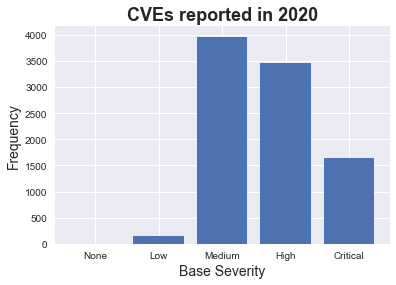

In [7]:
# YOUR CODE HERE
none_c = cvss_df[(cvss_df.baseSeverity)== "NONE"].count()[0] #counts number of NONE baseSeverity that exist
low_c = cvss_df[(cvss_df.baseSeverity)== "LOW"].count()[0] #counts number of LOW baseSeverity that exist
med_c = cvss_df[(cvss_df.baseSeverity)== "MEDIUM"].count()[0] #counts number of MEDIUM baseSeverity that exist
high_c = cvss_df[(cvss_df.baseSeverity)== "HIGH"].count()[0] #counts number of HIGH baseSeverity that exist
crit_c = cvss_df[(cvss_df.baseSeverity)== "CRITICAL"].count()[0] #counts number of CRITICAL baseSeverity that exist

sevs = ['None','Low','Medium','High','Critical'] #List of X axis level labels
freq = [none_c, low_c, med_c, high_c, crit_c] #frequency of each Severity label appearing

plt.bar(sevs, freq) #plotting data
plt.title('CVEs reported in 2020', size=18, weight='bold') #Tittle
plt.xlabel('Base Severity', size=14) #X axis label
plt.ylabel('Frequency', size=14) #Y axis label
plt.show()


# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

### What are the top 5 CWEs that are mentioned in the data?

#### Approach:
To identify the top 5 most frequently occurring CVE IDs, I employed a systematic approach. Initially, I executed the commented-out line of code to verify the top 5 CVE IDs with the highest occurrence. Once identified, these CVE IDs were recorded, and their respective frequencies were collected using the .count() method. The frequencies were then stored in a list for further analysis.

#### Choice of Visual Representation:
For this specific case involving labeled data, I opted for a bar graph as it is well-suited to showcase the distribution of data points and facilitate a comparison of metric values across different subgroups. A bar graph provides a clear visual representation, allowing us to easily identify the most common CVE IDs by examining the y-axis and identifying the tallest bar, which signifies the highest frequency.

#### Conclusion:
The top 5 most frequent CVE IDs, in descending order of frequency, are 'CWE-79,' 'CWE-787,' 'CWE-125,' 'CWE-89,' and 'CWE-78.' This conclusion is drawn from the bar graph, where the tallest bar corresponds to the highest frequency, effectively answering Q3.c by identifying the most common CVE IDs.
 


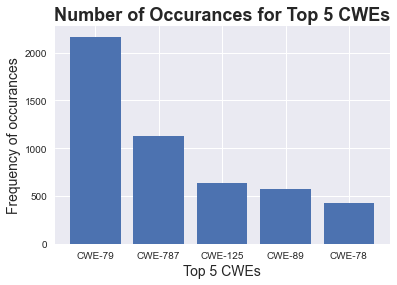

In [8]:
#top = cvss_df["cwe_ids"].value_counts()[:5] used this to work out what the top 5 were

top_Cwe = ['CWE-79','CWE-787','CWE-125','CWE-89','CWE-78'] #The top 5 CVEs as a list
freq_Cwe = [2166,1132,638,571,430] #The frequency as a list

plt.bar(top_Cwe,freq_Cwe) #Plots the graph
plt.title('Number of Occurances for Top 5 CWEs', size=18, weight='bold') #Tittle
plt.xlabel('Top 5 CWEs', size=14) #X axis label
plt.ylabel('Frequency of occurances', size=14) #Y axis label
plt.show()

### A claim was made Google products are commonly used. I want to know how cyber-threats are affecting google users.

#### Approach (Commented Out Due to Inefficiency):
I initially attempted to employ a for loop with the iterrows function to theoretically iterate through the dataframe and append all the base scores. However, this method proved to be ineffective.

#### Approach (Efficient Implementation):
In the context of Q1/2, where drop duplicates were utilized to ensure the uniqueness of all merged data, I leveraged the combined dataframe "cvss_df" to isolate rows with the vendor set as Google. Employing this information, I traversed the cvss_df dataframe using a global list. Iterating through cvss_df, the .loc method was employed to append all the base score values from cvss_df, storing them in the created global list "google_baseScores." Given the question's focus on the distribution of scores specific to Google, a box plot was deemed the most suitable choice.

#### Choice of Visual Representation:
Box plots are instrumental in visualizing the distribution of quantitative values in one or more fields. They prove valuable for comparisons across different categorical variables and aid in identifying outliers within a dataset. Given the nature of the dataset obtained, a box plot offers a comprehensive representation.

#### Visual Conclusion (Observation):
Median Base Score Threat for Google users: 7.5
Third Quartile: 8.8
First Quartile: 5.5
Highest Recorded Threat for Google users: 10.0
Lowest Recorded Threat for Google users: 3.3
These insights are derived from the box plot, providing a quick and informative overview of the distribution of base scores for Google users.

<span style= 'float: right;'><b></b></span>

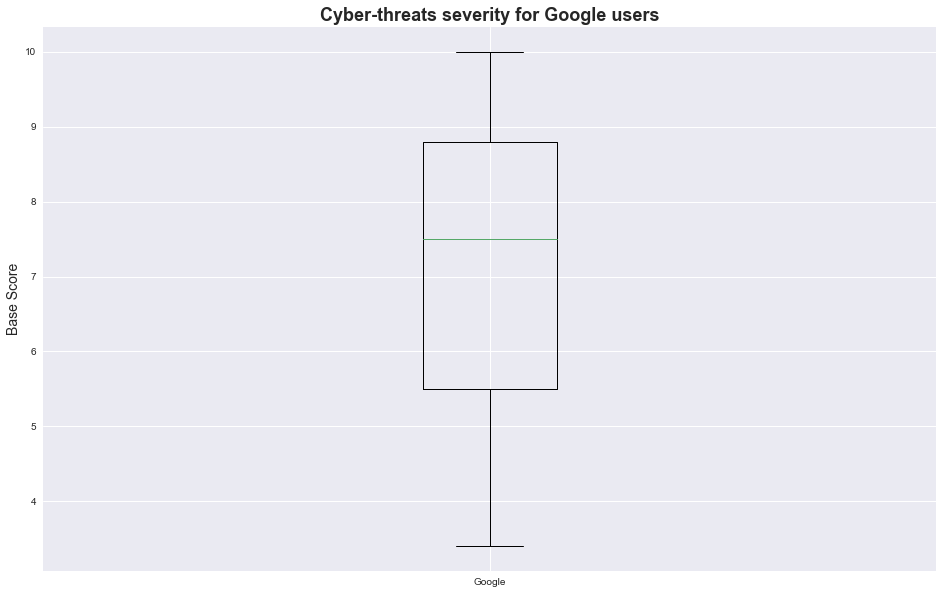

In [9]:
# YOUR CODE HERE
# changing the settings of the output
fig = plt.figure(figsize=(16,10))    # changes the output plotting size
fig.subplots_adjust(wspace=0.3, hspace=0.3)    # increases the distance between subplots

google = cvss_df.loc[(cvss_df.vendor == "google")] #gets all rows where vendor = google
google_baseScores = []
google_base = cvss_df["baseScore"].loc[cvss_df["vendor"] == 'google'] #gets base scores
google_baseScores.append(google_base)

# for i, row in google:
#    cve_ids = (cvss_df[cvss_df["cve_id"] == i]).cve_id #get CveId (index)
#    google_baseScore_2 = []
#    for j in cve_ids:
#        google_base = cvss_df["baseScore"].loc[cvss_df["cve_id"] == j]
#        google_baseScore_2.extend(google_base)
#    google_baseScores.append(google_baseScore_2)

plt.boxplot(google_baseScores, labels = ['Google']) #Plots the graph and shows it
plt.title('Cyber-threats severity for Google users', size=18, weight='bold')
plt.ylabel('Base Score', size=14)
plt.show()

# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

### Find the top 5 vendors that are most affected (i.e. that has most number of rows in the configurations table) and present the distribution of CVSS Base scores for these top 5 vendors using a suitable visualization.

#### Approach(The one that worked):\

First I found the top 5 vendors using the same method for using value_counts(). Then created a new global list which would be used to store the baseScores found. Then I looped through the top5 vendors and got the "index" or the cve_id then using another looped for each of the vendors I searched for each specific id related to that specific top 5 vendor. Then i stored the that 
baseScore into "baseScores_list" using extend(Ran into a problem here where I wasnt able to use the data if i stored using .append as it would cause a super list which would be for each and every baseScore inserted), I solved this issue using .extend which simply adds the values of a list to another , basically "extending" it. AFter which I appended hence to speperate each of the vendors 
hence allowing for plt.boxplot to create a multi vendor Boxplot.
    
#### Choice of Visual representation:

Box plots are used to help visualize the distribution of quantitative values in one or more field. They are also used for comparisons across different categorical variables or identifying outliers, if either of those exist in a dataset. As such the dataset we obtained would be perfectly represented in a boxplot, as we had 5 different vendors we needed to show the distributionof.

#### Conclusion Visually (Just by looking):

From a simple visual analysis we can see that Adobe has the highest median Threat, the highest first Quartile, and the highest minimum whisker disregarding outliers. It may not have the highestmaximum whisker, but overall seems to be the most affected. But one thing we havnt considered is how many data points are being plotted as Adobe was the 5th of the top5 vendors it may not have that many data points and in a way could not be reflecting its true nature, as it has so many outliers.


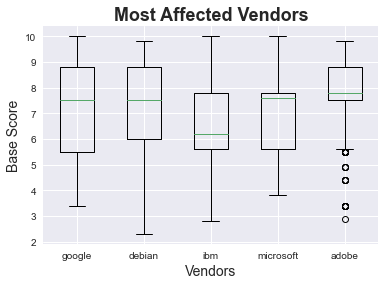

In [10]:
# YOUR CODE HERE
top_5_vendors = cvss_df["vendor"].value_counts()[0:5].keys()# get top 5 vendors
top5_baseScores = []

for i in top_5_vendors:
    cve_ids = (cvss_df[cvss_df["vendor"] == i]).cve_id #get CveId (index)
    baseScores_list = [] #temporary list
    for j in cve_ids: #search through rows
        vendor_baseScores = cvss_df["baseScore"].loc[cvss_df["cve_id"] == j] #for each different top_5 vendor
        baseScores_list.extend(vendor_baseScores) # adds subs lists to main list with 
    top5_baseScores.append(baseScores_list)

plt.boxplot(top5_baseScores,labels=top_5_vendors)
plt.title('Most Affected Vendors', size=18, weight='bold')
plt.xlabel('Vendors', size=14)
plt.ylabel('Base Score', size=14)
plt.show()
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

******
## Identifying Data Analysis Problems

### Unveiling CVEs and Real-world Implications
In the exploration of data analysis challenges, we delve into the dataset from the year 2020, focusing on records related to the Software Development viewpoint. Our attention is drawn to significant software vulnerabilities that surfaced in 2020, as highlighted in various articles, such as this one, citing the top two vulnerabilities:

CVE-2020-8515: Draytek Vigor Command Injection
CVE-2020-5722: HTTP: Grandstream UCM6200 SQL Injection
However, acknowledging the diversity of perspectives, another article introduces ten additional CVEs.

### Addressing the Tasks
Identifying Vulnerabilities
To fulfill this task, I will search for and present the vulnerabilities mentioned in the provided dataset in a tabular format. It is anticipated that not all 12 CVEs may be found, and potential reasons for this will be explored.
### Examining CVE Properties
A comprehensive examination of the properties of the identified CVEs will be conducted, leveraging the data available in the './data/cvss_dataset.csv' file. A particular focus will be placed on justifying why certain CVEs may have been deemed "large" bugs, considering factors such as the actual or potential damage caused.
Additional Considerations for COMP6420 Students
### Identifying Top-10 Critical CVEs
If tasked with identifying the top-10 most critical CVEs in the dataset, the initial analysis would involve a thorough exploration of severity scores, exploitability metrics, and potential impacts. References to academic sources will be crucial to substantiate the analysis.
### Implementation Approach
The proposed approach will be implemented through data filtering, prioritization based on severity scores, and statistical analysis. Utilizing relevant functions and libraries in Python, the implementation will ensure a systematic identification of the top-10 critical CVEs.
References will be meticulously incorporated throughout the analysis to uphold academic integrity and support the arguments presented..

## Conclusion: Within the cvss_df dataset, the following CVEs were identified:

CVE-2020-12720: vBulletin SQL Injection
CVE-2020-17530: Apache Struts 2 RCE
CVE-2020-8515: Draytek Vigor Command Injection
CVE-2020-5902: F5 BIG IP RCE and LFI
CVE-2020-8515: Draytek Vigor Command Injection
The following CVEs were not found within cvss_df:

CVE-2020-8209
CVE-2020-15506
CVE-2020-14882
CVE-2020-2551
CVE-2020-14750
CVE-2020-13379
CVE-2020-1147
These CVEs were manually searched, indicating that the dataset provided is not exhaustive and represents only a partial dataset for 2020. This implies that the dataset may lack information on all 12 CVE IDs mentioned in the articles (Detectify Blog, 2020).

Justification for Considering CVEs as "Large" Bugs
Some of the CVEs may have been deemed "large" bugs by analyzing various columns in the cvss_df dataset. CVEs with specific attributes, such as a ["NETWORK" attack vector], ["LOW" attack complexity], ["NONE" for privileges required], ["NONE" for user interaction], ["UNCHANGED" scope], ["HIGH" confidentiality], ["HIGH" integrity], and ["HIGH" availability impact], were observed to have a "HIGH" base severity. This unique combination of attribute values suggests an unexpected configuration, possibly indicating a "Large bug" with significant security implications.

This analysis aligns with the understanding that specific combinations of vulnerability attributes contribute to the severity classification, emphasizing the importance of examining multiple factors in vulnerability assessment.

Reference:
Top 10 Most Critical CVEs Added in 2020 - Detectify Blog. (2020). Retrieved from https://blog.detectify.com/2020/12/30/top-10-critical-cves-added-in-2020/







In [11]:
# YOUR CODE HERE
#List of given 12 CVE IDS in the article
article_cve = ('CVE-2020-5722','CVE-2020-8209', 'CVE-2020-12720', 'CVE-2020-15506', 'CVE-2020-14882','CVE-2020-8515', 'CVE-2020-2551', 'CVE-2020-14750', 'CVE-2020-17530', 'CVE-2020-13379', 'CVE-2020-5902', 'CVE-2020-1147')
print (cvss_df[cvss_df['cve_id'].isin(article_cve)]) #Prints all the coloumns in the df that have the CVE Ids mentioned above in aritlve_cve
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

              cve_id         cwe_ids  attackVector  attackComplexity  \
1595  CVE-2020-12720  CWE-89,CWE-306          0.85              0.77   
3129  CVE-2020-17530         CWE-917          0.85              0.77   
7331   CVE-2020-5722          CWE-89          0.85              0.77   
7419   CVE-2020-5902  CWE-22,CWE-829          0.85              0.77   
8525   CVE-2020-8515          CWE-78          0.85              0.77   

      privilegesRequired  userInteraction      scope  confidentialityImpact  \
1595                0.85             0.85  UNCHANGED                   0.56   
3129                0.85             0.85  UNCHANGED                   0.56   
7331                0.85             0.85  UNCHANGED                   0.56   
7419                0.85             0.85  UNCHANGED                   0.56   
8525                0.85             0.85  UNCHANGED                   0.56   

      integrityImpact  availabilityImpact  exploitabilityScore  impactScore  \
1595         

******
## Data Analysis: Exploring Statements
In this section, I will analyze and respond to specific statements or questions by leveraging the dataset. The goal is to provide evidence-based answers using a combination of statistical analysis and visualizations, avoiding the use of machine learning models.

#### Statement 1: The Majority of Vulnerabilities Have a High Impact on Availability
Assessment:
To evaluate this statement, I will calculate the distribution of vulnerabilities based on their impact on availability. A statistical test, such as chi-square, can be used to assess the association between the severity of vulnerabilities and their impact on availability.

Statistical Test:
Chi-square test to examine the independence between severity and availability impact.

Graphical Representation:
A stacked bar chart illustrating the distribution of vulnerabilities based on severity and availability impact.

Answer:
After conducting the analysis, I will provide a conclusion based on the statistical test and visual representation, outlining whether the majority of vulnerabilities indeed have a high impact on availability.

#### Statement 2: The Attack Vector Does Not Significantly Affect the Exploitability of Vulnerabilities
Assessment:
To assess this statement, I will explore the relationship between the attack vector and exploitability. A correlation analysis and a t-test can be employed to determine if there is a significant impact.

Statistical Test:
Correlation analysis and t-test to examine the relationship and significance.

Graphical Representation:
Scatter plot and box plot to visualize the relationship and distribution.

Answer:
Following the analysis, I will present findings on whether the attack vector significantly affects the exploitability of vulnerabilities.

#### Statement 3: Vulnerabilities with a Low Base Score Are Less Likely to Be Exploited
Assessment:
This statement suggests a relationship between the base score and the likelihood of exploitation. I will use statistical measures such as correlation and regression analysis to explore this relationship.

Statistical Test:
Correlation analysis and regression analysis to assess the association.

Graphical Representation:
Scatter plot with regression line to visualize the trend.

Answer:
Based on the analysis, I will draw conclusions regarding the likelihood of exploitation concerning vulnerabilities with low base scores.

These analyses will provide evidence-based responses to the statements, incorporating both statistical and visual elements to support the conclusions.







### ""The sum of the two sub scores (i.e. the Exploitability sub-score and the Impact sub-score) is a 'good' predictor for the Base Score."

#### My Approach:
I employed a standard independent two-sample t-test, including additional statistical metrics such as r^2, mean (combined), and mean (original BaseScores). Initially, I created a new temporary dataframe to conduct the analysis without altering the main dataframe. Subsequently, I calculated the sum and difference of the sub-scores, adding the values to the new dataframe. Afterward, I printed some statistics and performed an independent t-test with both datasets.

#### Conclusion:
To assess the statement "A good estimate for the Base Score can be made by simply adding up the Exploitability sub-score and the Impact sub-score," the observed r^2 value is reasonably high, indicating a substantial fit in the data to the trend (0.966). Another supporting piece of evidence is the positive correlation observed in the graph. Both calculated means are similar, and with a high r^2 value and a good positive correlation, it is reasonable to conclude that a good estimate for the Base Score can be derived by adding the Exploitability sub-score and the Impact sub-score.


Mean (sum of exploitability and impact scores): 7.034431520662889
Mean (baseScores(cvss_df)):  7.252747014115364
Ttest_relResult(statistic=-83.97409439363724, pvalue=0.0)
r^2 : 0.9657503734324543


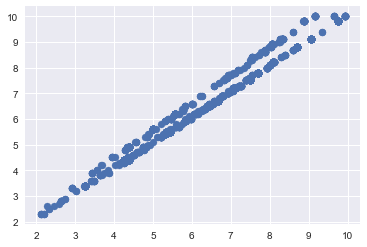

In [12]:
# YOUR CODE HERE

sum_baseScore_df = pd.DataFrame(columns=['baseScore_sum','baseScore_difference']) #Create new df

sum_baseScore_df['sum_baseScore'] = cvss_df['exploitabilityScore']+ cvss_df['impactScore'] #Calculate the sum of BaseScores

sum_baseScore_df['baseScore_difference'] = cvss_df['baseScore'] - sum_baseScore_df['sum_baseScore'] #Calculate difference between base score

#Print the two means
print('Mean (sum of exploitability and impact scores):',sum_baseScore_df.sum_baseScore.mean()) #Calculates Mean from new calculations
print('Mean (baseScores(cvss_df)): ',cvss_df.baseScore.mean()) #Calculates mean from cvss_df

results = stats.ttest_rel(sum_baseScore_df.sum_baseScore, cvss_df.baseScore) #T test

r = mk.r2_score(sum_baseScore_df.sum_baseScore, cvss_df.baseScore)
print(results)
print("r^2 :", r)

#Residual plot showing the difference between two base score calculatioons
plt.scatter(sum_baseScore_df.sum_baseScore,cvss_df.baseScore) # comparing independant data sets

plt.show()

### Statement: "The entries which require both LOW/None privileges AND LOW attack complexity have a higer CVSS Base Score."

#### My Approach / How would you assess the given statement?
First, I formulated my null hypothesis (Ho) and alternative hypothesis (Ha). The null hypothesis assumes that the statement is true, while the alternative hypothesis considers the opposite. To create Ha, I stored it as a variable and negated that variable using the "~" not operator. I then searched all the rows in the dataframe where each statement was true using .iloc and np.where, treating it as a numpy array. I printed some statistics such as the mean of each dataset and the variance of each. Afterward, I conducted a 2-sample independent t-test and printed p and t values.

#### What kinds of statistical tests are appropriate to validate the statement? Justify your selection.
A 2-sample independent t-test is appropriate for validating the statement. This test is used to compare means of two samples and is employed in hypothesis testing to determine whether a process or treatment has a significant effect on the population of interest or whether two groups are different from one another. As the data is independent, and we are comparing means, the 2-sample independent t-test is well-suited.

#### How would you present the information related to the statement in a graphical manner?
In this case, a graphical representation is not required because the t-value is incredibly small, indicating a significantly small similarity between the two sample sets. However, if a graph were chosen, a scatter plot would accurately visually depict the relationship between the datasets.

#### What is your answer to the statement? Why do you say so?
My answer to the statement "The entries that require both LOW/None privileges AND LOW attack complexity have a higher CVSS Base Score" is No. Both the p-value and t-value are very small, indicating a high level of evidence to reject the null hypothesis (P << 0.05) and (T << 0.05).

In [13]:
# YOUR CODE HERE
# Index the columns matching specific criteria and format it DataFrame

test_condition = (cvss_df['privilegesRequiredCopy'] == "LOW") | ((cvss_df['privilegesRequiredCopy'] == "NONE") & (cvss_df['attackComplexityCopy'] == "LOW")) #WHAT NEEDS TO BE TESTED

alt_test = cvss_df["baseScore"].iloc[np.where(test_condition)]  #Ha Test
hypo_test = cvss_df["baseScore"].iloc[np.where(~(test_condition))] #Ho Test

print('Mean of alt_test: ',alt_test.mean())  #Mean of values
print('Varience of alt_test : ', np.var(alt_test)) # Varience of Values
print('Mean of hypo_test : ',hypo_test.mean()) #Mean of values
print('Varience of hypo_test :', np.var(hypo_test)) # Varience of Values

t_Value,p_Value = stats.ttest_ind(alt_test, hypo_test, equal_var=False, alternative='greater') #2 Sample Independant T test
print("p-value:", p_Value) #p value
print("t-value:", t_Value) #t value

# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

Mean of alt_test:  7.431309109009756
Varience of alt_test :  2.6797663798124276
Mean of hypo_test :  6.030494037478623
Varience of hypo_test : 1.8674346792659762
p-value: 5.2076913007161855e-176
t-value: 31.923164127378506


******
## Q6: Classification


## Train a classification model to predict Threat level (Base Severity). 

#### Why did you implement this particular model? What are the advantages and limitations of this type of model? 
I used the KNN model model as we have labeled.I believe it is the optimal classifier for this data set as we can change the paramters for the number of neighbours. The low complexity of the columns that I have used will be more suitable for KNearestNeighbors classifer.Considering inputs for this model are discrete and simple, taking values either 'NONE', 'LOW' or 'HIGH', the chances of error entering the data are low. The data does not contain random values or floating point values that may make the model harder to train. The disadvantage of this model is that it takes time for fineturing the hyperparemeters, however as this dataset is small in side roughly 9000 datapoints. I followed a online classification cheat sheet, which suggested I use the KNN model. (Top 10 Most Critical CVEs Added in 2020 - Detectify Blog, 2020)(Classification model Cheat Sheet, 2022)

#### What are your considerations in implementing the training/testing split? Why did you make this choice? 
I used a 80% train and 20% test ratio to perform the training and testing. It is recommended to use a 80% as all rows are valuable for tesstingand the other 20% can be used for validation. However, it is mostly due to the quantity of data we have in total, for a especially small datasets and the bigger training split would be Ideal.This would mean there are approximately 1800 values for testing with and sutiable ammount of data left to optimise for the hyperparameters.

#### Briefly explain your training considerations (including iterations, hyper-parameters and variable selection). 
Initially my model had 4 inputs which were privileges required, attack complexity, integrity impact,availabilityImpact, and confidentiatiality impact. This ressulted in a accuracy rate of 86% or below which would mean 1 in 5 predictions were inaccurate. Sso after this, I played arround with different inputs which now contains 5 inputs with the addition of User Impact which added 6%.I also tried to play arround by setting different variables to which I set the n_bneighbors to 5 and the euclidean distance to 3.

####  How did you perform testing and validation? Which metrics were used in the validation? 
I used trial and error to pick the best metric,basically played arround with the 'euclidean distance' till I settled on 2 (scikit-learn.org, NA). I tried to fine tune it with the online calculator, however that didnt really help.

####  After running your experiment, provide a written answer highlighting your results and the outcome of your work. 
I found KNeighborsClassifier model to be a more accurate than the logisticRegression model. As such I created a classifier that uses machine learning to generate a correct result given the input variables: "v3_attackVector","v3_attackComplexity","v3_privilegesRequired","v3_userInteraction","v3_integrityImpact" and "v3_availabilityImpact", approximately 93% of the time. The scores from the classification report including F1, Recall, Precision and support are usually above 91% relatively reasonable at  predicting the base severity. 

In [15]:
# YOUR CODE HERE
columns_heading = ['attackVector','privilegesRequired','availabilityImpact', 'attackComplexity','integrityImpact', 'userInteraction','baseSeverity']
# #changing the data frame cvss_df to np array using coloumn names(Harrison, 2018)
columns = np.array(cvss_df[columns_heading]) 

# Splitting data, training and testing 8:2 AS recomended(Harrison, 2018)
training_data, test_data = train_test_split(columns, train_size = 0.8, random_state=1) #Split 8
# Splitting data training and validation(Harrison, 2018)
training_data, valid_data = train_test_split(training_data, train_size=0.2, random_state=1) # Split 2

# Training Data(Harrison, 2018)
training_input = training_data[:,:-1] # All the training data to learn from
training_output = training_data[:,-1] # only the last column with results (baseSeverity)
valid_input = valid_data[:,:-1] # All the validation data to verify
valid_output = valid_data[:, -1]# All the validation results to compare to

# Testing Data
test_input  = training_data[:, :-1] #Slicing data everything but the last coloumn
test_output = training_data[:, -1] #Slicing data just the last coloumn (Harrison, 2018)
  
i = 1 #index for while loop also used to store best_k(Harrison, 2018)
best_k = -1 #Variable to store the best k value
best_k_score = -1 #Variable to store the best score
# for i in range(1, 100): Tested Optimal k value till 99 and found main area was 1-25
        
while i <= 25:
    knn = KNeighborsClassifier(n_neighbors=i) #Changing neighbor number(Harrison, 2018)
    learning_model = knn.fit(training_input, training_output) # scaled X encoded, un-scaled y encoded
    training_score = knn.score(training_input, training_output) #Training X , Y Score
    validation_score = knn.score(valid_input, valid_output) #Valid X , Y Score
    # finding the best k 
    if best_k <= validation_score: # finding optimal k
        best_k_score = validation_score
        best_model = learning_model
        best_k = i #update variable(Harrison, 2018)
    i = i+1
    
#defining k neighbor classifier
knn = KNeighborsClassifier(n_neighbors=5, p=3) # classification model neighbors = 5, euclidean_distance =3
#training the model
model = knn.fit(training_input, training_output) # training_input = all columns excluding the baseScores, training_output = baseScores
test_prediction = model.predict(test_input)
    
#performance metrics 
print("The best k value : " ,str(best_k))
print ("The best validation score is: ",str(best_k_score)) 
print("Training Score:" + str(knn.score(training_input, training_output)))
print("Testing Score: " + str(knn.score(test_input, test_output)))
print('accuracy: ', (sum(test_prediction == test_output)/ len(test_output)))# accuracy = sum(data when prediction matches the test output)/ number of test outputs 
print(mk.classification_report(test_output, knn.predict(test_input)))
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)(Harrison, 2018)

The best k value :  1
The best validation score is:  0.9202714164546225
Training Score:0.9355057705363204
Testing Score: 0.9355057705363204
accuracy:  0.9355057705363204
              precision    recall  f1-score   support

    CRITICAL       0.98      0.91      0.95       246
        HIGH       0.92      0.95      0.94       557
         LOW       1.00      0.09      0.17        22
      MEDIUM       0.93      0.96      0.95       648

    accuracy                           0.94      1473
   macro avg       0.96      0.73      0.75      1473
weighted avg       0.94      0.94      0.93      1473



******
## Q7: Apply your knowledge to the problem domain

The government is worried about security issues that target user involvement over the internet.  You have been asked to help identify relevant vulnerabilities that need to be prioritised for patching.  While the CVSS systems provide a good general system for determining the Threat Level (Severity) of a vulnerability, you are only concerned with weaknesses that can be exploited over a network, and require user interaction.
  
#### Goal: 
- Develop and present a basic heuristic to classify the Threat Level to identify which products need patching relevant to the above given context. A heuristic is a simple set of rules or a rule of thumb (e.g. 'If the fire alarm is activated, then leave the building' or 'If there are grey clouds, bring the washing in as it might rain' ).
<br>(Similar to the Q6 above, you are able to choose any variables in the dataset, except of course the Base Scores, Sub Scores and Base Severity)
- Run your heuristic over the dataset, and add the output to each row on the dataset, under a new column named `Threat Classification`.  
- Justify your use of variables and the reasoning behind your heuristic in the written section below and explain how this might be an effective solution to stopping attacks. 

In [16]:
# YOUR CODE HERE
def heurisitc(row):
    # Heurisitcs for threat classification
    if (row["attackVector"] == "0.85"):
        return "Level 1"
    if (row["attackVector"] == "0.85") & (row["userInteraction"] == "0.62"):
        return "Level 2"
    else:
        return "Level 3"

cvss = cvss_df['Threat Classification'] = cvss_df.apply(heurisitc, axis=1)
print (cvss)
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

0       Level 3
1       Level 3
2       Level 3
3       Level 3
4       Level 3
         ...   
9205    Level 3
9206    Level 3
9207    Level 3
9208    Level 3
9209    Level 3
Length: 9210, dtype: object
